# DATA200 Final Project
Authors: Cameron Zhang, Syed Atif
Date: April 2024

### Summary of Contents
1. Introduction
2. Data Cleaning
3. Regression and Classification
4. Conclusion

### Introduction
The dataset used for this project is a Current Population Survey, which includes various factors such as wage, education, work experience, and other variables. The main objective of this project is to determine the most influential factors in predicting wage. By analyzing the dataset and applying regression and classification techniques, we aim to gain insights into the relationship between these factors and wage. This analysis can provide valuable information for individuals, organizations, and policymakers in understanding the key determinants of wage and making informed decisions related to employment and compensation.


### Data Cleaning

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

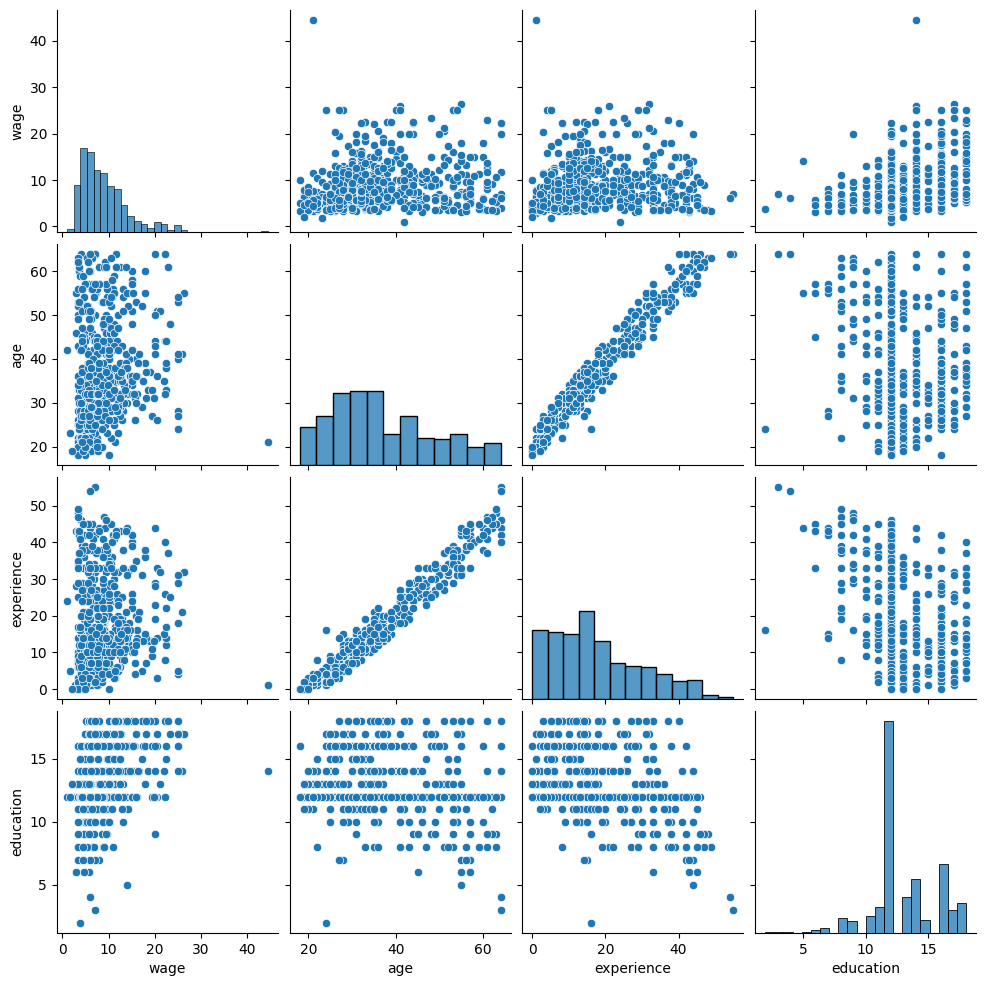

In [4]:
df = pd.read_csv("wage.data.txt", sep=r'\s+')

## look at relationships between continuous variables
sns.pairplot(df.loc[:,["wage", "age", "experience", "education"]])

The histograms provide a visual representation of the distribution of each variable. For example, the education variable seems to be normally distributed, with a peak around the middle values. The wage variable appears to be right-skewed, indicating that there are more lower-wage observations compared to higher-wage observations.

The scatterplots show the relationship between two variables. For instance, the scatterplot between age and wage suggests that there is no clear linear relationship between these variables. However, there seems to be a cluster of observations with higher wages for individuals in their 30s and 40s.

The pairplot shows the relationships between the continuous variables (wage, age, experience, and education). It appears that there is a positive correlation between age and experience, indicating that as individuals get older, they tend to have more work experience.

In [5]:
print(np.corrcoef(df.wage, df.education))
print(np.corrcoef(df.age, df.experience))

[[1.         0.38192207]
 [0.38192207 1.        ]]
[[1.         0.97796125]
 [0.97796125 1.        ]]


Notice that age and wage are the only continuous variables with a relationship, and that they are almost perfectly linear.

### Regression



In [8]:
# Read the data line by line
with open('wage.data.txt', 'r') as file:
    lines = file.readlines()
# Extract column names from the first row
column_names = lines[0].split()
# Initialize an empty list to store properly formatted rows
formatted_rows = []
# Iterate over each line (excluding the first row) and format it
for line in lines[1:]:
    # Split the line by spaces
    line_data = line.split()
    # Remove any empty strings from the split
    line_data = [item for item in line_data if item]
    # Append the formatted row to the list
    formatted_rows.append(line_data)

# Convert the list of rows into a DataFrame
wage_data = pd.DataFrame(formatted_rows, columns=column_names)

# Print the first few rows of the DataFrame
wage_data.head()

,education,south,sex,experience,union,wage,age,race,occupation,sector,marr
0,8,0,1,21,0,5.1,35,2,6,1,1
1,9,0,1,42,0,4.95,57,3,6,1,1
2,12,0,0,1,0,6.67,19,3,6,1,0
3,12,0,0,4,0,4,22,3,6,0,0
4,12,0,0,17,0,7.5,35,3,6,0,1


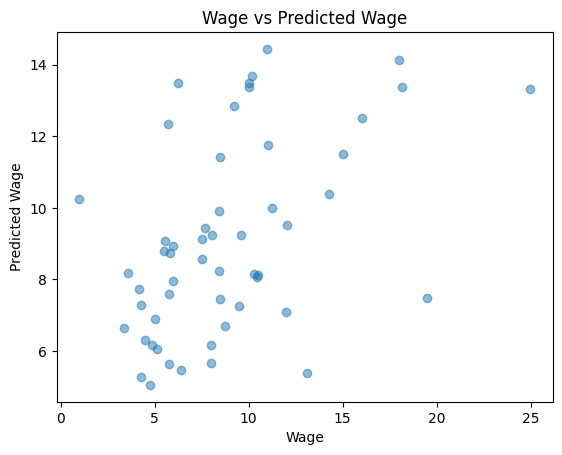

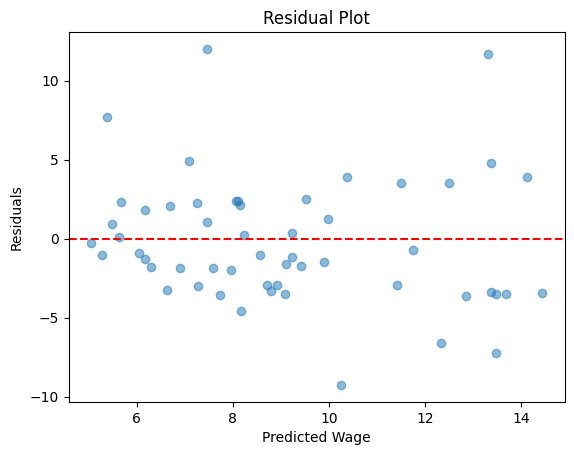

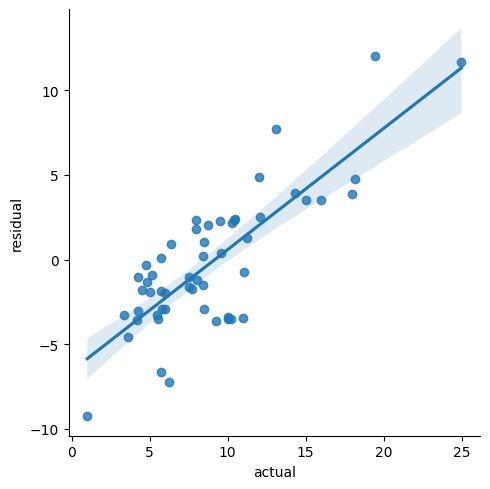

In [9]:
response_variable =  pd.to_numeric(wage_data['wage'], errors='coerce')
new_wage_data = wage_data.drop(['wage'], axis=1)

np.random.seed(5)
X_train, X_test, y_train, y_test = train_test_split(new_wage_data, response_variable, test_size = 0.10)

# Write your code here
linear_model = LinearRegression()
linear_model.fit(X_train, y_train);

# Predict housing prices on the test set
y_pred = linear_model.predict(X_test) 

# Plot predicted vs true wage
plt.scatter(y_test, y_pred, alpha=0.5) 
plt.xlabel("Wage") 
plt.ylabel("Predicted Wage") 
plt.title("Wage vs Predicted Wage")
plt.show()


residuals = y_test - y_pred
# Plot residuals vs predicted values
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Wage")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')  # Adding horizontal line at y=0 for reference
plt.show()

residuals = y_test - y_pred
residual_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred, 'residual': residuals}) 
sns.lmplot(x='actual', y='residual', data=residual_df)


In [ ]:
# Get the coefficients of the linear regression model
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': linear_model.coef_})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()

# Sort coefficients by absolute value to identify most influential variables
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Plot coefficients to visualize the impact of each variable on wage
plt.figure(figsize=(10, 6))
plt.barh(coefficients['Variable'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Coefficients of Linear Regression Model')
plt.show()

# Print coefficients to examine the impact of each variable
print(coefficients)